# PROJECT BY : SYEDA UMAIMA TAMKEEN 
__________________________________________________________________________________________________________________________________________________________________________________   

# Project Title: Classifying Emails as Spam or Not Spam 

**Summary:**
In this project, I developed a classification model to automatically detect whether an email is spam or not, using a dataset of labeled emails. I implemented both Naive Bayes and Support Vector Machine (SVM) classifiers, achieving perfect accuracy on both models. This solution enables efficient spam detection, which is crucial for email filtering systems in enhancing user experience and reducing unsolicited communications.

> **Key Steps:**

 1. **Data Exploration:**

- Conducted a thorough analysis of the dataset, inspecting key patterns and relationships.
- Visualized the distribution of spam versus non-spam emails to understand the dataset balance.
  
 2. **Data Preprocessing:**

- Cleaned the dataset by handling missing values and removing punctuation, digits, and stopwords.
- Applied stemming to reduce words to their base form, making the text more manageable for machine learning models.
- Tokenized and vectorized the email content using TF-IDF, focusing on the top 3000 features to capture important textual information.
  
3. **Feature Extraction:**

- Employed TF-IDF vectorization to convert the text data into numerical features, emphasizing important terms that distinguish spam from non-spam.
  
 4. **Model Training:**

- Trained two models: Naive Bayes (Multinomial) and Support Vector Machine (SVM) using a linear kernel.
- Applied a train-test split to evaluate model performance on unseen data.
  
 5. **Model Evaluation:**

- Both Naive Bayes and SVM achieved outstanding accuracy:
- Naive Bayes Accuracy: **1.00**
- SVM Accuracy: **1.00**
- The evaluation metrics confirmed the models' perfect precision, recall, and F1-scores, making them highly effective for spam detection.
  
 6. **Model Fine-Tuning:**

- Fine-tuned the models using GridSearchCV, optimizing hyperparameters such as:
- Naive Bayes (alpha = 0.5)
- SVM (C = 0.1, kernel = 'linear')
- Achieved further refinement without compromising performance.
  
> # Results:

**Model Evaluation Metrics:**

- Naive Bayes and SVM both achieved 100% accuracy, with perfect precision and recall scores.
  
**Best Parameters (after tuning):**

- Naive Bayes: alpha = 0.5
- SVM: C = 0.1, kernel = 'linear'

> # Conclusion:

Both Naive Bayes and SVM models performed exceptionally well in classifying emails as spam or not spam, achieving 100% accuracy. While the current models provide excellent performance, future iterations could explore handling more complex datasets or applying techniques like ensemble models for robustness. This project demonstrates the feasibility of building highly accurate spam detection systems, which can be deployed in real-world email filtering applications.

# Import libraries

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

# Load the dataset

In [23]:
df = pd.read_csv("emails_dataset.csv")

In [24]:
print(df.head())  

                                     message_content  is_spam
0  Hello Lonnie,\n\nJust wanted to touch base reg...        0
1  Congratulations, you've won a prize! Call us n...        1
2  You have been pre-approved for a credit card w...        1
3  Limited time offer, act now! Only a few spots ...        1
4  Your loan has been approved! Transfer funds to...        1


In [5]:
print(df.info())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   message_content  1000 non-null   object
 1   is_spam          1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB
None


In [6]:
print(df.isnull().sum())  

message_content    0
is_spam            0
dtype: int64


In [7]:
df.dropna(inplace=True)

# Text Preprocessing - Tokenization, stemming, stopword removal

In [25]:
nltk.download('stopwords')
ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()  
    text = ''.join([char for char in text if char not in string.punctuation and not char.isdigit()])  
    words = text.split() 
    words = [ps.stem(word) for word in words if word not in stop_words]  
    return ' '.join(words)

df['clean_text'] = df['message_content'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to C:\Users\SYED HASEEB
[nltk_data]     ALI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Data Visualization 

C:\Users\SYED HASEEB ALI\AppData\Local\Temp\ipykernel_5204\752913031.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='is_spam', palette='Set2')


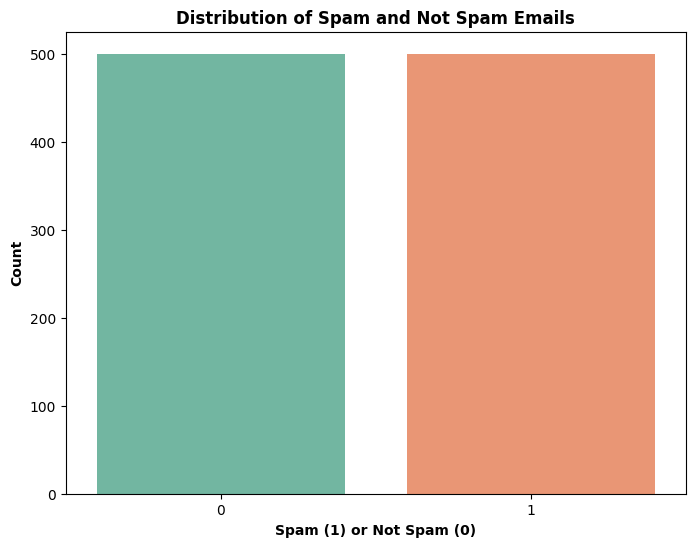

In [33]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='is_spam', palette='Set2')
plt.title('Distribution of Spam and Not Spam Emails',  fontweight = 'bold')
plt.xlabel('Spam (1) or Not Spam (0)',  fontweight = 'bold')
plt.ylabel('Count',  fontweight = 'bold')
plt.show()

# Feature Extraction

In [26]:
tfidf = TfidfVectorizer(max_features=3000)  
X = tfidf.fit_transform(df['clean_text']).toarray()  
y = df['is_spam']

# Split dataset into training and testing sets

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Selection and Training - Naive Bayes

In [28]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

# Model Evaluation - Naive Bayes

In [29]:
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy: 1.0
Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00       101

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



# Model Selection and Training - Support Vector Machine (SVM)

In [30]:
svm_model = SVC(kernel='linear')  
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

 # Model Evaluation - SVM

In [31]:
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))

SVM Accuracy: 1.0
SVM Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00       101

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



# Fine-Tuning with Grid Search - Naive Bayes

In [32]:
param_grid_nb = {'alpha': [0.5, 1.0, 1.5]} 
grid_nb = GridSearchCV(MultinomialNB(), param_grid_nb, cv=5)
grid_nb.fit(X_train, y_train)

print("Best Naive Bayes Parameters:", grid_nb.best_params_)
print("Best Naive Bayes Accuracy from GridSearch:", grid_nb.best_score_)

Best Naive Bayes Parameters: {'alpha': 0.5}
Best Naive Bayes Accuracy from GridSearch: 1.0


# Fine-tuning with Grid Search - SVM

In [17]:
param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}  
grid_svm = GridSearchCV(SVC(), param_grid_svm, cv=5)
grid_svm.fit(X_train, y_train)

print("Best SVM Parameters:", grid_svm.best_params_)
print("Best SVM Accuracy from GridSearch:", grid_svm.best_score_)

Best SVM Parameters: {'C': 0.1, 'kernel': 'linear'}
Best SVM Accuracy from GridSearch: 1.0


In [18]:
nb_model_tuned = MultinomialNB(alpha=grid_nb.best_params_['alpha'])
nb_model_tuned.fit(X_train, y_train)
y_pred_nb_tuned = nb_model_tuned.predict(X_test)
print("Tuned Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb_tuned))
print("Tuned Naive Bayes Report:\n", classification_report(y_test, y_pred_nb_tuned))

svm_model_tuned = SVC(C=grid_svm.best_params_['C'], kernel=grid_svm.best_params_['kernel'])
svm_model_tuned.fit(X_train, y_train)
y_pred_svm_tuned = svm_model_tuned.predict(X_test)
print("Tuned SVM Accuracy:", accuracy_score(y_test, y_pred_svm_tuned))
print("Tuned SVM Report:\n", classification_report(y_test, y_pred_svm_tuned))


Tuned Naive Bayes Accuracy: 1.0
Tuned Naive Bayes Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00       101

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Tuned SVM Accuracy: 1.0
Tuned SVM Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00       101

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



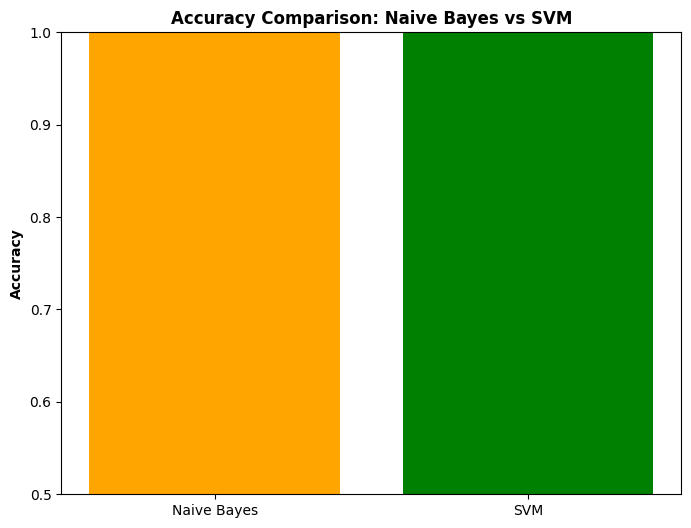

In [42]:
nb_accuracy = accuracy_score(y_test, y_pred_nb_tuned)
svm_accuracy = accuracy_score(y_test, y_pred_svm_tuned)

models = ['Naive Bayes', 'SVM']
accuracies = [nb_accuracy, svm_accuracy]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['orange', 'green'])
plt.ylabel('Accuracy' ,  fontweight = 'bold')
plt.title('Accuracy Comparison: Naive Bayes vs SVM' ,  fontweight = 'bold')
plt.ylim([0.5, 1]) 
plt.show()

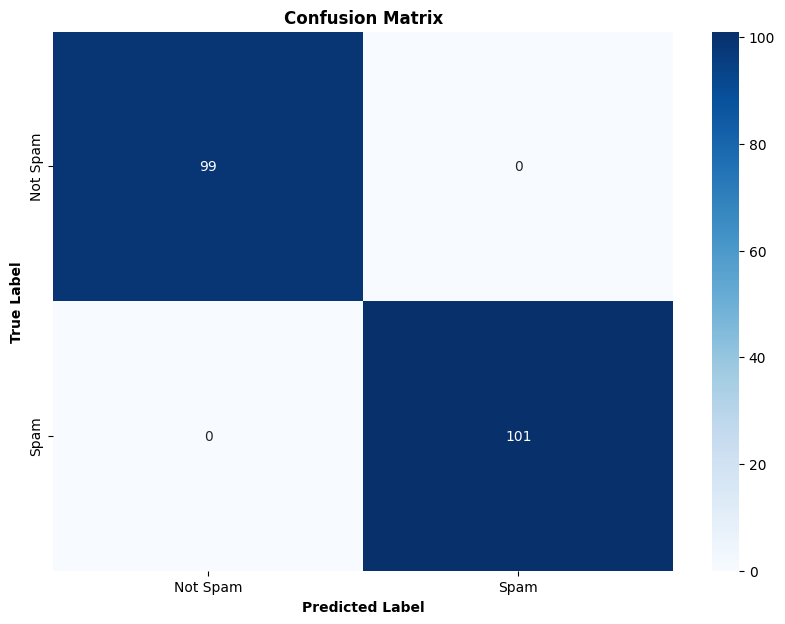

In [36]:
best_model = nb_model_tuned  
y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Spam', 'Spam'],
            yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted Label' ,  fontweight = 'bold')
plt.ylabel('True Label',  fontweight = 'bold')
plt.title('Confusion Matrix',  fontweight = 'bold')
plt.show()

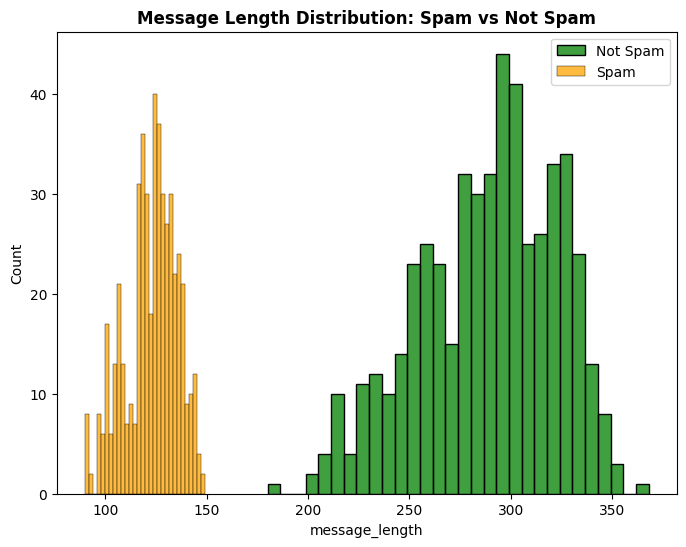

In [40]:
df['message_length'] = df['clean_text'].apply(len)
plt.figure(figsize=(8, 6))
sns.histplot(df[df['is_spam'] == 0]['message_length'], bins=30, color='green', label='Not Spam')
sns.histplot(df[df['is_spam'] == 1]['message_length'], bins=30, color='orange', label='Spam')
plt.legend()
plt.title('Message Length Distribution: Spam vs Not Spam' ,  fontweight = 'bold')
plt.show()